In [26]:
from fusions.cfm import CFMBase
import numpy as np
import matplotlib.pyplot as plt
import anesthetic as ns

In [27]:
dims = 5
from scipy.stats import multivariate_normal,uniform
from numpy.random import default_rng

rng = default_rng(0)
# from sklearn.datasets import make_spd_matrix
# cov=make_spd_matrix(dims)
prior = multivariate_normal(mean=rng.normal(size=dims))
model = CFMBase(prior)

In [28]:
class bimodal_distribution(object):
    def __init__(self):
        self.dist_1=multivariate_normal(mean=rng.normal(size=dims),cov=np.eye(dims)*rng.uniform(size=dims)*0.1)
        self.dist_2=multivariate_normal(mean=rng.normal(size=dims),cov=np.eye(dims)*rng.uniform(size=dims)*0.1)
    def rvs(self,n):
        data_1=self.dist_1.rvs(n//2)
        data_2=self.dist_2.rvs(n//2)
        return np.concatenate([data_1,data_2])

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


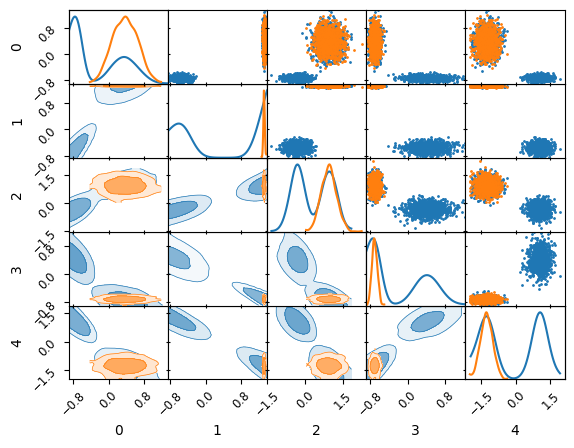

In [29]:
target= bimodal_distribution()
data=target.rvs(2000)
a=ns.MCMCSamples(data).plot_2d()
ns.MCMCSamples(target.dist_1.rvs(1000)).plot_2d(a)

In [30]:
model.train(data, n_epochs=3000,batch_size=512,lr=1e-3)

  0%|          | 0/3000 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [02:40<00:00, 18.69it/s, loss=0.3967833] 


In [37]:
x1=model.sample_posterior(1000,history=True)
# x1=model.predict(-uniform().rvs((1000,dims)))

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


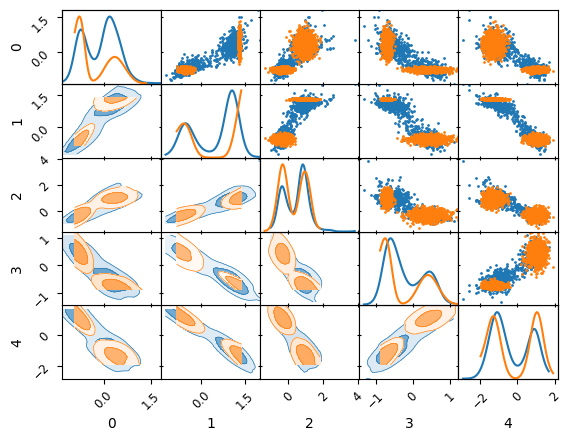

In [38]:

a=ns.MCMCSamples(x1).plot_2d()
ns.MCMCSamples(data).plot_2d(a)

In [33]:
new_data = multivariate_normal(mean=np.zeros(dims),cov=np.eye(dims)).rvs(2000)

In [34]:
model_2 = CFMBase(target)
model_2.train(new_data, n_epochs=3000,batch_size=512,lr=1e-3)

100%|██████████| 3000/3000 [02:25<00:00, 20.67it/s, loss=0.38522175]


In [35]:
x1=model_2.sample_posterior(1000,history=True)

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


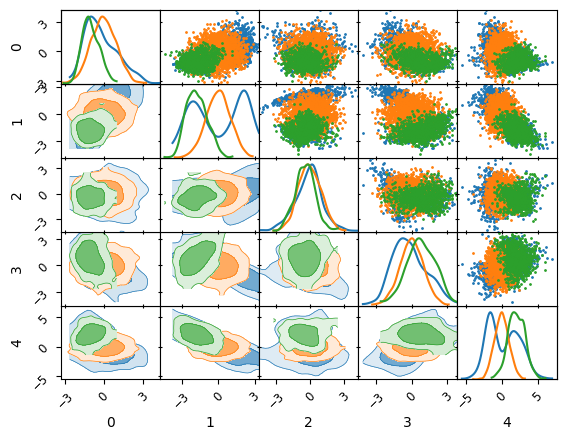

In [36]:

a=ns.MCMCSamples(x1).plot_2d()
ns.MCMCSamples(new_data).plot_2d(a)
ns.MCMCSamples(model_2.predict(target.dist_2.rvs(1000))).plot_2d(a)